In [1]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 14.8 MB/s eta 0:00:00


In [2]:
pip install arch pandas matplotlib scikit-learn

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.53e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.536e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarni

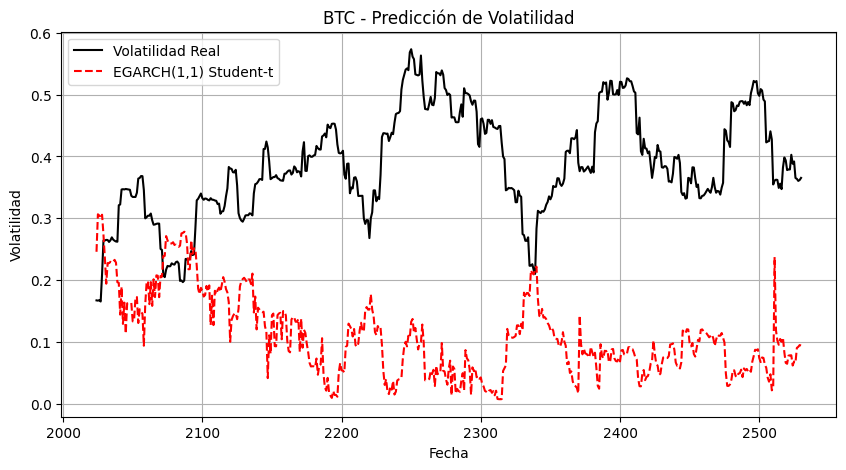

BTC - EGARCH(1,1) Student-t -> RMSE: 0.31089, MAE: 0.28208, MAPE: 68.94%


In [3]:
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ========== Cargar y preparar datos ==========
btc_data = pd.read_excel("BTC_Transformado.xlsx")
btc_vol = btc_data["Volatilidad"]
split = int(len(btc_vol) * 0.8)
train_btc, test_btc = btc_vol[:split].replace(0, 1e-6), btc_vol[split:].replace(0, 1e-6)

# ========== Escalado ==========
factor = 1000
train_scaled = train_btc * factor
test_scaled = test_btc * factor

# ========== Rolling forecast EGARCH(1,1) Student-t ==========
history = list(train_scaled)
preds = []

for t in range(len(test_scaled)):
    try:
        model = arch_model(history, vol="EGarch", p=1, q=1, dist="t")
        fit = model.fit(disp="off")
        forecast = fit.forecast(horizon=1)
        pred_var = forecast.variance.values[-1, 0]
        preds.append(np.sqrt(pred_var))
    except:
        preds.append(preds[-1] if preds else np.mean(history))
    history.append(test_scaled.iloc[t])

preds = np.array(preds) / factor  # Desescalar
# ========== Métricas y gráfico ==========
rmse = np.sqrt(mean_squared_error(test_btc, preds))
mae = mean_absolute_error(test_btc, preds)
mape = np.mean(np.abs((test_btc - preds) / test_btc)) * 100

plt.figure(figsize=(10, 5))
plt.plot(test_btc.index, test_btc, label="Volatilidad Real", color="black")
plt.plot(test_btc.index, preds, label="EGARCH(1,1) Student-t", linestyle="--", color="red")
plt.title("BTC - Predicción de Volatilidad")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.grid(True)
plt.show()

print(f"BTC - EGARCH(1,1) Student-t -> RMSE: {rmse:.5f}, MAE: {mae:.5f}, MAPE: {mape:.2f}%")

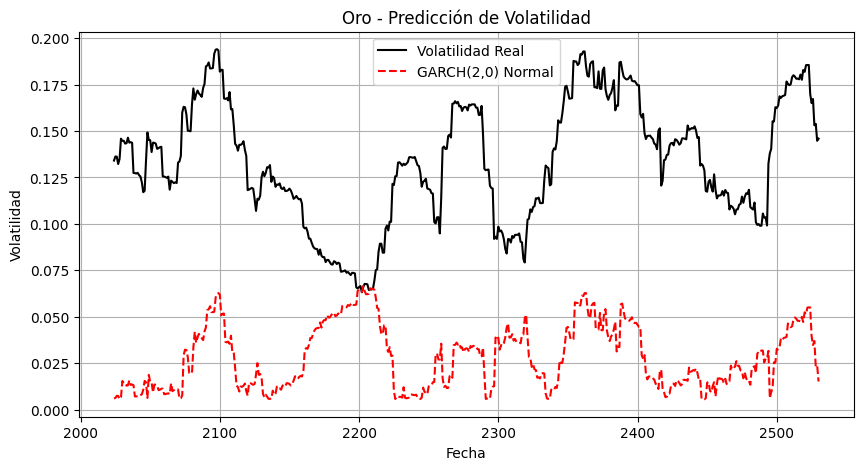

Oro - GARCH(2,0) Normal -> RMSE: 0.11108, MAE: 0.10505, MAPE: 76.43%


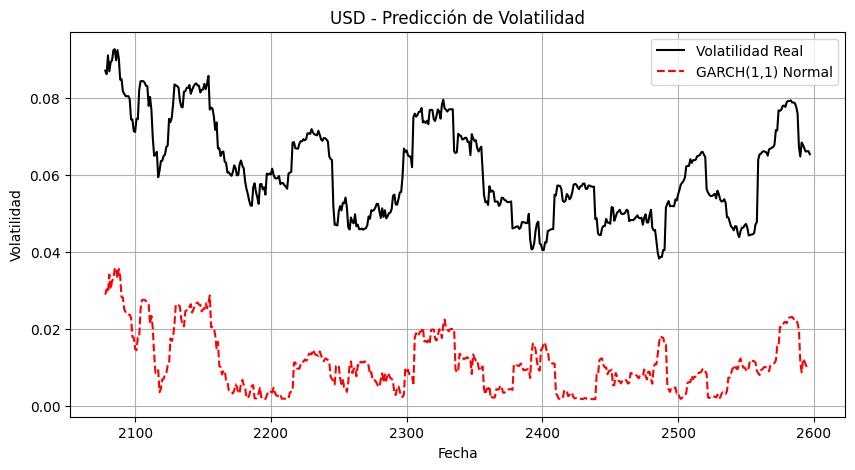

USD - GARCH(1,1) Normal -> RMSE: 0.05096, MAE: 0.05016, MAPE: 82.58%


In [4]:
# ========== Cargar y preparar datos ==========
gold_data = pd.read_excel("Oro_Transformado.xlsx")
usd_data = pd.read_excel("DXY_Transformado.xlsx")
gold_vol = gold_data["Volatilidad"]
usd_vol = usd_data["Volatilidad"]

def preparar_datos(vol):
    split = int(len(vol) * 0.8)
    train = vol[:split].replace(0, 1e-6)
    test = vol[split:].replace(0, 1e-6)
    return train, test

train_gold, test_gold = preparar_datos(gold_vol)
train_usd, test_usd = preparar_datos(usd_vol)

# ========== Función de ejecución ==========
def ejecutar_garch(train, test, activo, p, q):
    factor = 1000
    train_scaled = train * factor
    test_scaled = test * factor

    history = list(train_scaled)
    preds = []

    for t in range(len(test_scaled)):
        try:
            model = arch_model(history, vol="Garch", p=p, q=q, dist="normal")
            fit = model.fit(disp="off")
            forecast = fit.forecast(horizon=1)
            pred_var = forecast.variance.values[-1, 0]
            preds.append(np.sqrt(pred_var))
        except:
            preds.append(preds[-1] if preds else np.mean(history))
        history.append(test_scaled.iloc[t])

    preds = np.array(preds) / factor
    rmse = np.sqrt(mean_squared_error(test, preds))
    mae = mean_absolute_error(test, preds)
    mape = np.mean(np.abs((test - preds) / test)) * 100

    plt.figure(figsize=(10, 5))
    plt.plot(test.index, test, label="Volatilidad Real", color="black")
    plt.plot(test.index, preds, label=f"GARCH({p},{q}) Normal", linestyle="--", color="red")
    plt.title(f"{activo} - Predicción de Volatilidad")
    plt.xlabel("Fecha")
    plt.ylabel("Volatilidad")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{activo} - GARCH({p},{q}) Normal -> RMSE: {rmse:.5f}, MAE: {mae:.5f}, MAPE: {mape:.2f}%")

# ========== Ejecutar ==========
ejecutar_garch(train_gold, test_gold, "Oro", p=2, q=0)
ejecutar_garch(train_usd, test_usd, "USD", p=1, q=1)

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.53e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.536e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarni

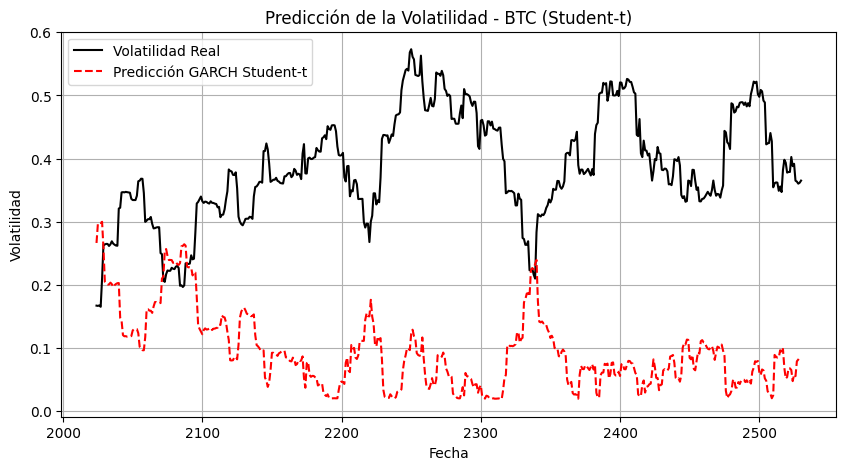

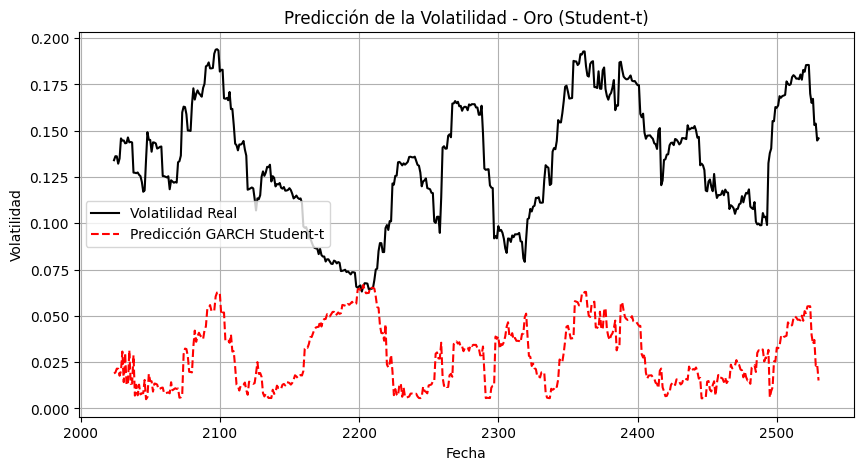

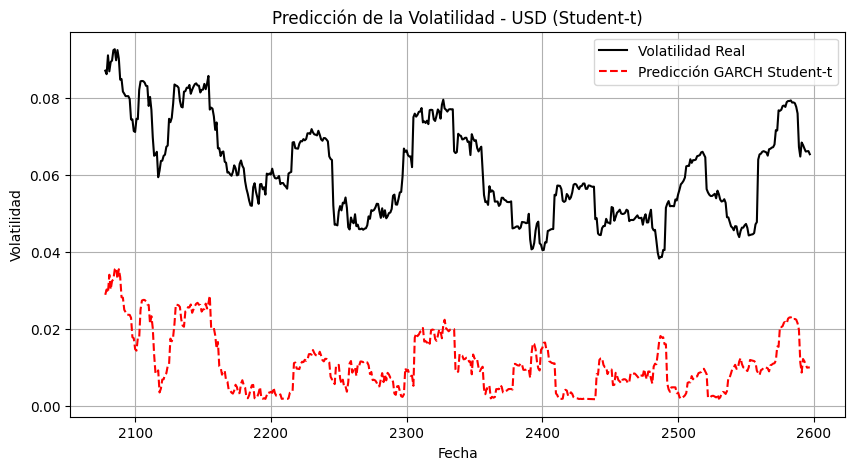

  Activo  p  q      RMSE       MAE   MAPE (%)
0    BTC  1  1  0.322049  0.295860  72.664973
1    Oro  2  0  0.110753  0.104769  76.252311
2    USD  1  1  0.050980  0.050171  82.585374


In [5]:
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ============================
# Escalado
# ============================
def escalar_serie(serie, factor=1000):
    return serie * factor, factor

def desescalar_serie(serie, factor):
    return serie / factor

# ============================
# Rolling forecast con Student-t
# ============================
def ajustar_garch_studentt(train_data, test_data, asset_name, p, q):
    train_data = train_data.replace(0, 1e-6)
    test_data = test_data.replace(0, 1e-6)

    train_scaled, factor = escalar_serie(train_data)
    test_scaled, _ = escalar_serie(test_data)

    history = list(train_scaled)
    predicciones = []

    for t in range(len(test_scaled)):
        try:
            modelo = arch_model(history, vol="Garch", p=p, q=q, dist="t")
            ajuste = modelo.fit(disp="off")
            forecast = ajuste.forecast(horizon=1)
            var_pred = forecast.variance.values[-1, 0]
            if np.isnan(var_pred) or var_pred <= 0 or var_pred > 1e6:
                raise ValueError("Varianza anómala")
            predicciones.append(np.sqrt(var_pred))
        except:
            predicciones.append(predicciones[-1] if predicciones else np.mean(history))
        history.append(test_scaled.iloc[t])

    predicciones = desescalar_serie(np.array(predicciones), factor)

    # Métricas
    rmse = np.sqrt(mean_squared_error(test_data, predicciones))
    mae = mean_absolute_error(test_data, predicciones)
    mape = np.mean(np.abs((test_data - predicciones) / test_data)) * 100

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(test_data.index, test_data, label="Volatilidad Real", color="black")
    plt.plot(test_data.index, predicciones, label="Predicción GARCH Student-t", linestyle="dashed", color="red")
    plt.title(f"Predicción de la Volatilidad - {asset_name} (Student-t)")
    plt.xlabel("Fecha")
    plt.ylabel("Volatilidad")
    plt.legend()
    plt.grid(True)
    plt.show()

    return asset_name, p, q, rmse, mae, mape

# ============================
# Cargar tus datos reales
# ============================
btc_data = pd.read_excel("BTC_Transformado.xlsx")
gold_data = pd.read_excel("Oro_Transformado.xlsx")
usd_data = pd.read_excel("DXY_Transformado.xlsx")

btc_vol = btc_data["Volatilidad"]
gold_vol = gold_data["Volatilidad"]
usd_vol = usd_data["Volatilidad"]

# Dividir
def split_series(serie, ratio=0.8):
    split = int(len(serie) * ratio)
    return serie[:split], serie[split:]

train_btc, test_btc = split_series(btc_vol)
train_gold, test_gold = split_series(gold_vol)
train_usd, test_usd = split_series(usd_vol)

# ============================
# Aplicar combinaciones óptimas con Student-t
# ============================
combinaciones = [
    ("BTC", train_btc, test_btc, 1, 1),
    ("Oro", train_gold, test_gold, 2, 0),
    ("USD", train_usd, test_usd, 1, 1)
]

resultados = []
for nombre, train, test, p, q in combinaciones:
    res = ajustar_garch_studentt(train, test, nombre, p, q)
    resultados.append(res)

# Mostrar resumen
df_resultados = pd.DataFrame(resultados, columns=["Activo", "p", "q", "RMSE", "MAE", "MAPE (%)"])
print(df_resultados)

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.53e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.536e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarni

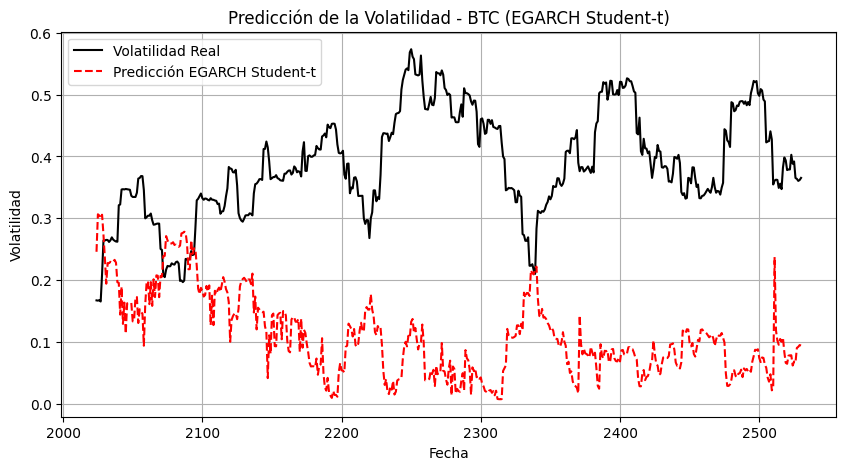

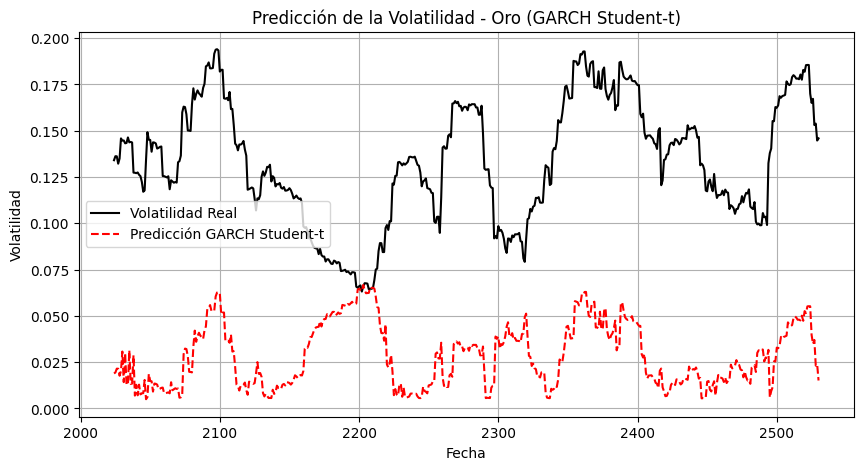

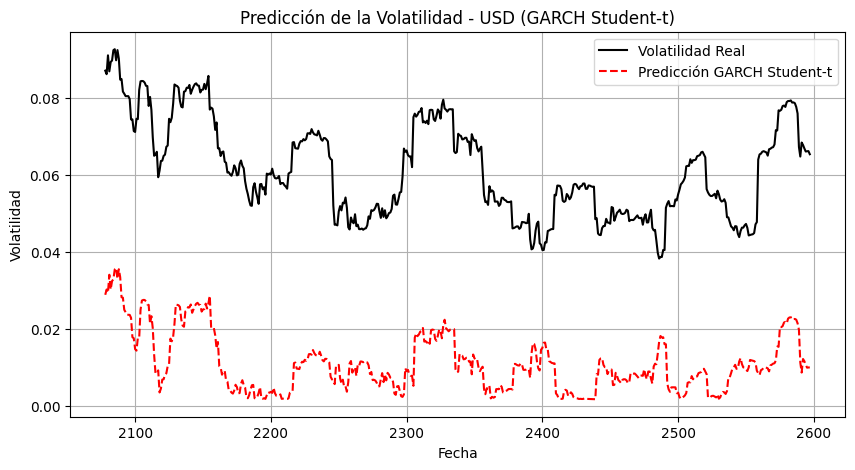

  Activo  Modelo  p  q      RMSE       MAE   MAPE (%)
0    BTC  EGARCH  1  1  0.310890  0.282082  68.938051
1    Oro   GARCH  2  0  0.110753  0.104769  76.252311
2    USD   GARCH  1  1  0.050980  0.050171  82.585374


In [6]:
def ajustar_modelo_studentt(train_data, test_data, asset_name, modelo="GARCH", p=1, q=1):
    train_data = train_data.replace(0, 1e-6)
    test_data = test_data.replace(0, 1e-6)

    train_scaled, factor = escalar_serie(train_data)
    test_scaled, _ = escalar_serie(test_data)

    history = list(train_scaled)
    predicciones = []

    for t in range(len(test_scaled)):
        try:
            m = arch_model(history,
                           vol="Garch" if modelo == "GARCH" else "EGarch",
                           p=p, q=q,
                           dist="t")  # Distribución Student-t
            ajuste = m.fit(disp="off")
            var_pred = ajuste.forecast(horizon=1).variance.values[-1, 0]
            if np.isnan(var_pred) or var_pred <= 0 or var_pred > 1e6:
                raise ValueError("Varianza anómala")
            predicciones.append(np.sqrt(var_pred))
        except:
            predicciones.append(predicciones[-1] if predicciones else np.mean(history))
        history.append(test_scaled.iloc[t])

    predicciones = desescalar_serie(np.array(predicciones), factor)

    # Métricas
    rmse = np.sqrt(mean_squared_error(test_data, predicciones))
    mae = mean_absolute_error(test_data, predicciones)
    mape = np.mean(np.abs((test_data - predicciones) / test_data)) * 100

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(test_data.index, test_data, label="Volatilidad Real", color="black")
    plt.plot(test_data.index, predicciones, label=f"Predicción {modelo} Student-t", linestyle="dashed", color="red")
    plt.title(f"Predicción de la Volatilidad - {asset_name} ({modelo} Student-t)")
    plt.xlabel("Fecha")
    plt.ylabel("Volatilidad")
    plt.legend()
    plt.grid(True)
    plt.show()

    return asset_name, modelo, p, q, rmse, mae, mape

combinaciones = [
    ("BTC", train_btc, test_btc, "EGARCH", 1, 1),
    ("Oro", train_gold, test_gold, "GARCH", 2, 0),
    ("USD", train_usd, test_usd, "GARCH", 1, 1)
]

resultados = []
for nombre, train, test, modelo, p, q in combinaciones:
    res = ajustar_modelo_studentt(train, test, nombre, modelo=modelo, p=p, q=q)
    resultados.append(res)

df_resultados = pd.DataFrame(resultados, columns=["Activo", "Modelo", "p", "q", "RMSE", "MAE", "MAPE (%)"])
print(df_resultados)